#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Importing Data

In [3]:
data=np.loadtxt("data.csv", delimiter=",", skiprows=1)
x=data[:,0:4]
y=data[:,4]
y=np.reshape(y, (-1,1))

##### Scaling the data

In [4]:
scaler_x = MinMaxScaler()
scaler_y = MinMaxScaler()
print(scaler_x.fit(x))
xscale=scaler_x.transform(x)
print(scaler_y.fit(y))
yscale=scaler_y.transform(y)

MinMaxScaler(copy=True, feature_range=(0, 1))
MinMaxScaler(copy=True, feature_range=(0, 1))


#### Train-Test Split

In [5]:
x_train, x_test, y_train, y_test = train_test_split(xscale, yscale, test_size=0.2, random_state=45)

#### Model

In [6]:
model = Sequential()
model.add(Dense(35, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 35)                175       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 36        
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='mse', optimizer='adam', metrics=['mse','mae'])

In [8]:
history = model.fit(x_train, y_train, epochs=150, batch_size=50,  verbose=1, validation_split=0.2)

Train on 45 samples, validate on 12 samples
Epoch 1/150
45/45 [==============================] - 3s 64ms/sample - loss: 0.3001 - mse: 0.3001 - mae: 0.4626 - val_loss: 0.2450 - val_mse: 0.2450 - val_mae: 0.3777
Epoch 2/150
45/45 [==============================] - 0s 2ms/sample - loss: 0.2902 - mse: 0.2902 - mae: 0.4528 - val_loss: 0.2383 - val_mse: 0.2383 - val_mae: 0.3693
Epoch 3/150
45/45 [==============================] - 0s 343us/sample - loss: 0.2806 - mse: 0.2806 - mae: 0.4431 - val_loss: 0.2321 - val_mse: 0.2321 - val_mae: 0.3610
Epoch 4/150
45/45 [==============================] - 0s 347us/sample - loss: 0.2714 - mse: 0.2714 - mae: 0.4344 - val_loss: 0.2261 - val_mse: 0.2261 - val_mae: 0.3528
Epoch 5/150
45/45 [==============================] - 0s 347us/sample - loss: 0.2624 - mse: 0.2624 - mae: 0.4257 - val_loss: 0.2203 - val_mse: 0.2203 - val_mae: 0.3463
Epoch 6/150
45/45 [==============================] - 0s 897us/sample - loss: 0.2539 - mse: 0.2539 - mae: 0.4172 - val_loss: 

Epoch 50/150
45/45 [==============================] - 0s 377us/sample - loss: 0.0950 - mse: 0.0950 - mae: 0.2701 - val_loss: 0.1330 - val_mse: 0.1330 - val_mae: 0.3319
Epoch 51/150
45/45 [==============================] - 0s 2us/sample - loss: 0.0936 - mse: 0.0936 - mae: 0.2678 - val_loss: 0.1319 - val_mse: 0.1319 - val_mae: 0.3301
Epoch 52/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0923 - mse: 0.0923 - mae: 0.2655 - val_loss: 0.1307 - val_mse: 0.1307 - val_mae: 0.3283
Epoch 53/150
45/45 [==============================] - 0s 322us/sample - loss: 0.0909 - mse: 0.0909 - mae: 0.2633 - val_loss: 0.1295 - val_mse: 0.1295 - val_mae: 0.3264
Epoch 54/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0896 - mse: 0.0896 - mae: 0.2611 - val_loss: 0.1283 - val_mse: 0.1283 - val_mae: 0.3245
Epoch 55/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0883 - mse: 0.0883 - mae: 0.2590 - val_loss: 0.1271 - val_mse: 0.1271 - val_mae: 0

Epoch 99/150
45/45 [==============================] - 0s 145us/sample - loss: 0.0455 - mse: 0.0455 - mae: 0.1713 - val_loss: 0.0779 - val_mse: 0.0779 - val_mae: 0.2357
Epoch 100/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0448 - mse: 0.0448 - mae: 0.1697 - val_loss: 0.0769 - val_mse: 0.0769 - val_mae: 0.2337
Epoch 101/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0441 - mse: 0.0441 - mae: 0.1681 - val_loss: 0.0759 - val_mse: 0.0759 - val_mae: 0.2318
Epoch 102/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0434 - mse: 0.0434 - mae: 0.1665 - val_loss: 0.0750 - val_mse: 0.0750 - val_mae: 0.2299
Epoch 103/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0427 - mse: 0.0427 - mae: 0.1649 - val_loss: 0.0740 - val_mse: 0.0740 - val_mae: 0.2280
Epoch 104/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0420 - mse: 0.0420 - mae: 0.1633 - val_loss: 0.0731 - val_mse: 0.0731 - val

Epoch 148/150
45/45 [==============================] - 0s 0s/sample - loss: 0.0204 - mse: 0.0204 - mae: 0.1092 - val_loss: 0.0385 - val_mse: 0.0385 - val_mae: 0.1525
Epoch 149/150
45/45 [==============================] - 0s 145us/sample - loss: 0.0201 - mse: 0.0201 - mae: 0.1084 - val_loss: 0.0380 - val_mse: 0.0380 - val_mae: 0.1511
Epoch 150/150
45/45 [==============================] - 0s 347us/sample - loss: 0.0198 - mse: 0.0198 - mae: 0.1075 - val_loss: 0.0374 - val_mse: 0.0374 - val_mae: 0.1497


#### Plotting the loss function

dict_keys(['loss', 'mse', 'mae', 'val_loss', 'val_mse', 'val_mae'])


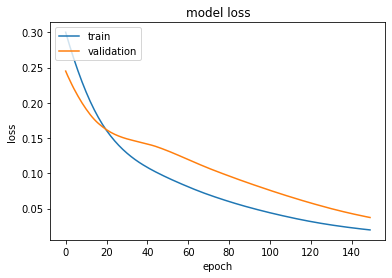

In [9]:
print(history.history.keys())
# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

#### Prediction

In [10]:
y_pred= model.predict(x_test)

#### Calculating errors

In [11]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.09967477912619964
Mean Squared Error: 0.01676428947682638
Root Mean Squared Error: 0.12947698435176183


In [12]:
list_of_tuples = list(zip(y_test, y_pred))
df = pd.DataFrame(list_of_tuples, columns = ['Measured', 'Predicted'], dtype='float') 

#### Plotting the measured and predicted values

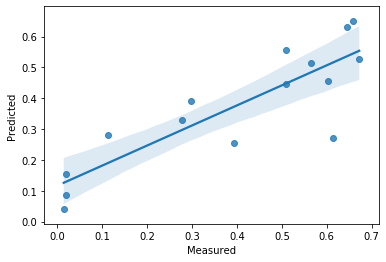

In [14]:
sns.regplot(x="Measured", y="Predicted", data=df);

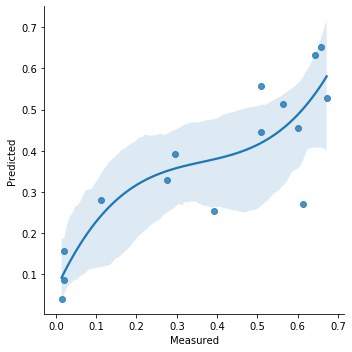

In [31]:
sns.lmplot(x="Measured", y="Predicted", data=df, order=3);